<a href="https://colab.research.google.com/github/Ark1645/Deep-Learning/blob/main/aMIT_EfficientnetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import tensorflow as tf
import numpy as np


In [ ]:
root = '/content/drive/MyDrive/MIT Indoorscene/indoorCVPR_09/Images'
img_width = 224
img_height = 224
batch_size = 64
#nb_epochs = 10

In [23]:
def prefucn(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=1 - 0.2, upper=1 + 0.2)
    image = tf.image.random_saturation(image, lower=1 - 0.2, upper=1 + 0.2)
    image = tf.image.random_hue(image, max_delta=0.2)
    return image

In [24]:
train_datagen = ImageDataGenerator(preprocessing_function=prefucn,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

In [25]:
train_generator = train_datagen.flow_from_directory(
    root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 14089 images belonging to 69 classes.


In [26]:
validation_generator = train_datagen.flow_from_directory(
    root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 1532 images belonging to 69 classes.


In [27]:
class_indices = train_generator.class_indices
print(class_indices)

{'airport_inside': 0, 'artstudio': 1, 'assets': 2, 'auditorium': 3, 'bakery': 4, 'bar': 5, 'bathroom': 6, 'bedroom': 7, 'bookstore': 8, 'bowling': 9, 'buffet': 10, 'casino': 11, 'children_room': 12, 'church_inside': 13, 'classroom': 14, 'cloister': 15, 'closet': 16, 'clothingstore': 17, 'computerroom': 18, 'concert_hall': 19, 'corridor': 20, 'deli': 21, 'dentaloffice': 22, 'dining_room': 23, 'elevator': 24, 'fastfood_restaurant': 25, 'florist': 26, 'gameroom': 27, 'garage': 28, 'greenhouse': 29, 'grocerystore': 30, 'gym': 31, 'hairsalon': 32, 'hospitalroom': 33, 'inside_bus': 34, 'inside_subway': 35, 'jewelleryshop': 36, 'kindergarden': 37, 'kitchen': 38, 'laboratorywet': 39, 'laundromat': 40, 'library': 41, 'livingroom': 42, 'lobby': 43, 'locker_room': 44, 'mall': 45, 'meeting_room': 46, 'movietheater': 47, 'museum': 48, 'nursery': 49, 'office': 50, 'operating_room': 51, 'pantry': 52, 'poolinside': 53, 'prisoncell': 54, 'restaurant': 55, 'restaurant_kitchen': 56, 'shoeshop': 57, 'stai

In [28]:
conv_base =  mobilenet_v2.MobileNetV2(include_top = False, weights='imagenet',input_shape = (224,224,3))

In [29]:
from tensorflow.keras import layers, models

In [30]:
!pip install efficientnet

In [31]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0


In [32]:
# Choose the desired EfficientNet variant (e.g., EfficientNetB0, EfficientNetB2)
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers (optional)
#for layer in efficientnet_base.layers[:-n]:  # Freeze the first n layers (experiment with n)
 #   layer.trainable = False


In [33]:
model = Sequential()
model.add(efficientnet_base)
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(69, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 69)                88389     
                                                                 
Total params: 4137960 (15.79 MB)
Trainable params: 4095937 (15.62 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [35]:
model.compile(Adam(learning_rate=6e-5 ), 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
import keras
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(filepath='model.h5', save_weights_only=True, save_freq=1)

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = 3,
    callbacks=[checkpoint]
    )

Epoch 1/4
220/220 [==============================] - 8348s 38s/step - loss: 3.5919 - accuracy: 0.1931 - val_loss: 2.6565 - val_accuracy: 0.3872
Epoch 2/4
220/220 [==============================] - 5121s 23s/step - loss: 2.2728 - accuracy: 0.4596 - val_loss: 1.7266 - val_accuracy: 0.5768
Epoch 3/4
220/220 [==============================] - 5028s 23s/step - loss: 1.5886 - accuracy: 0.5932 - val_loss: 1.2913 - val_accuracy: 0.6610
Epoch 4/4
220/220 [==============================] - 5100s 23s/step - loss: 1.2208 - accuracy: 0.6727 - val_loss: 1.0716 - val_accuracy: 0.7140


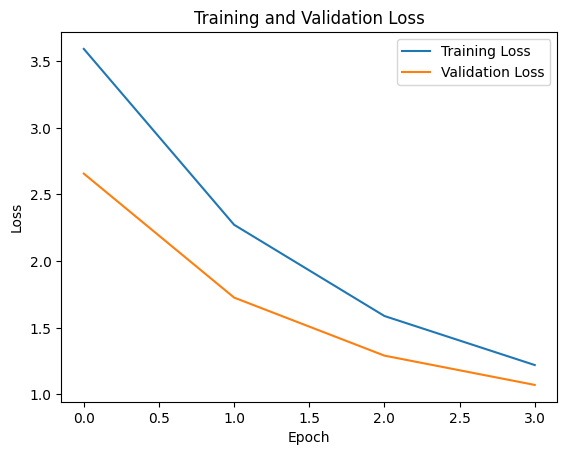

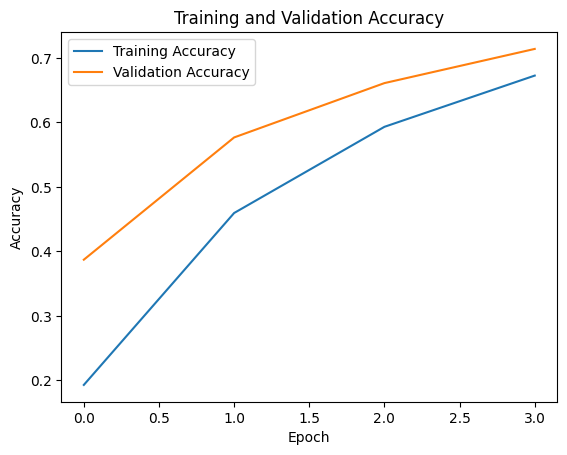

24/24 [==============================] - 159s 6s/step - loss: 1.0587 - accuracy: 0.7102
Validation Loss: 1.0586894750595093
Validation Accuracy: 0.710182785987854
24/24 [==============================] - 167s 7s/step
F1 Score: 0.02564741177519949
Precision: 0.024941221803578745
Recall: 0.026762402088772844


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Predict labels
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# F1 Score, Precision, Recall
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# # Confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Classification report
# class_labels = list(validation_generator.class_indices.keys())
# report = classification_report(y_true, y_pred, target_names=class_labels)
# print("Classification Report:")
# print(report)


In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
